<a href="https://colab.research.google.com/github/DeepaliSaini4/Machine-Learning/blob/main/CarQualityEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Performance:
              precision    recall  f1-score   support

         acc       0.95      0.92      0.94       118
        good       0.74      0.89      0.81        19
       unacc       1.00      0.99      1.00       358
       vgood       0.83      0.83      0.83        24

    accuracy                           0.97       519
   macro avg       0.88      0.91      0.89       519
weighted avg       0.97      0.97      0.97       519


KNN Performance:
              precision    recall  f1-score   support

         acc       0.90      0.86      0.88       118
        good       0.54      0.74      0.62        19
       unacc       0.98      0.99      0.98       358
       vgood       0.88      0.62      0.73        24

    accuracy                           0.94       519
   macro avg       0.83      0.80      0.81       519
weighted avg       0.94      0.94      0.94       519



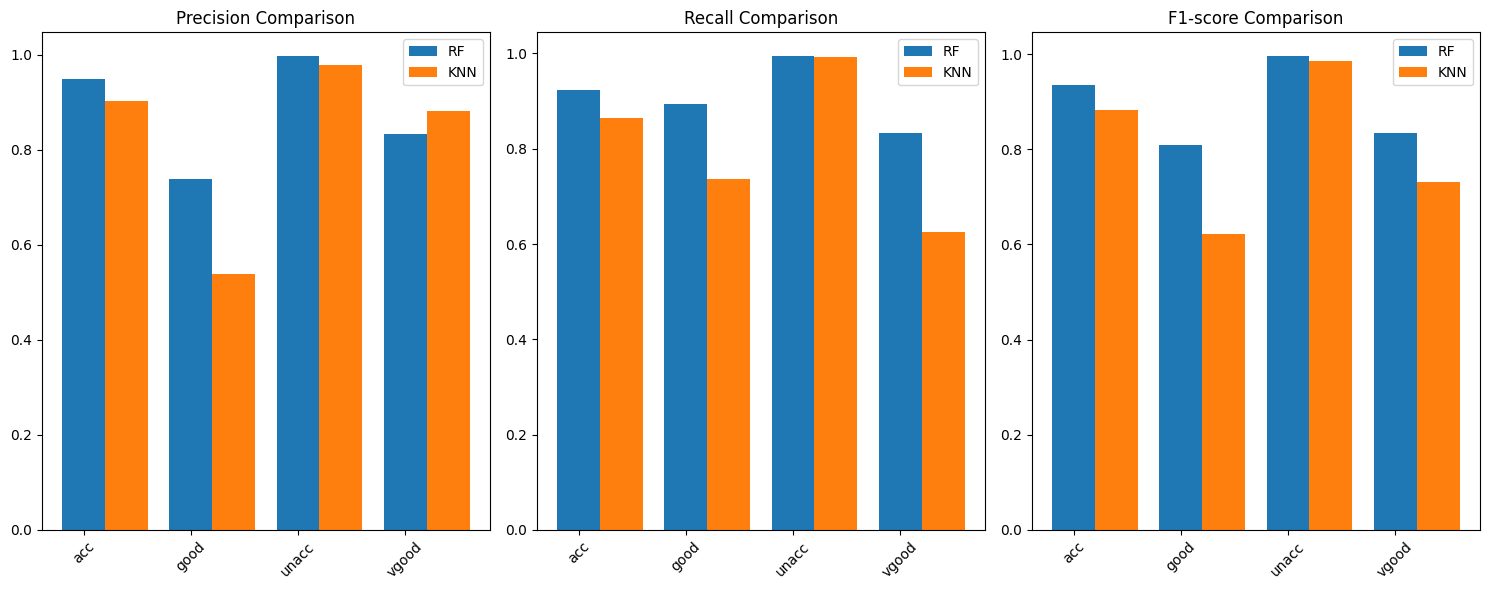

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load dataset directly from UCI URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, header=None, names=column_names)

# Define ordinal encoding order for features
feature_order = {
    'buying': ['low', 'med', 'high', 'vhigh'],
    'maint': ['low', 'med', 'high', 'vhigh'],
    'doors': ['2', '3', '4', '5more'],
    'persons': ['2', '4', 'more'],
    'lug_boot': ['small', 'med', 'big'],
    'safety': ['low', 'med', 'high']
}

# Encode features
encoder = OrdinalEncoder(categories=[feature_order[col] for col in column_names[:-1]])
X = encoder.fit_transform(df.iloc[:, :-1])

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(df['class'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Generate classification reports
rf_report = classification_report(y_test, y_pred_rf, target_names=le.classes_, output_dict=True)
knn_report = classification_report(y_test, y_pred_knn, target_names=le.classes_, output_dict=True)

# Print results
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))
print("\nKNN Performance:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

# Visual comparison
metrics = ['precision', 'recall', 'f1-score']
classes = le.classes_
plt.figure(figsize=(15, 6))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    plt.bar(classes, [rf_report[c][metric] for c in classes], width=0.4, label='RF')
    plt.bar([x + 0.4 for x in range(len(classes))], [knn_report[c][metric] for c in classes],
            width=0.4, label='KNN')
    plt.title(f'{metric.capitalize()} Comparison')
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()
